# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

In [509]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
import math
X, Y = make_blobs(n_samples =100, n_features=2, centers=6, cluster_std = 1.0, random_state=7)



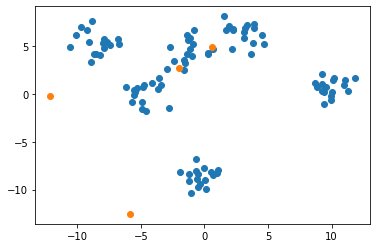

In [511]:
epsil=0.01
kn=4
k=23*np.random.sample((kn, 2))-13
k1 = [[0 for i in range (2)] for j in  range (len(k))]
plt.scatter(X[:,0], X[:,1])
plt.scatter(k[:,0], k[:,1])

4.63724106010536
11.428710071896772
17.50435480032351
20.28766222230441
1
1.0760132068780028
1.0760132068780028
1.8551042581572235
3.3721098086031693
2
0.5228097472194422
0.5228097472194422
0.5228097472194422
0.9115510435925263
3
0.0
0.0
0.0
0.0
4


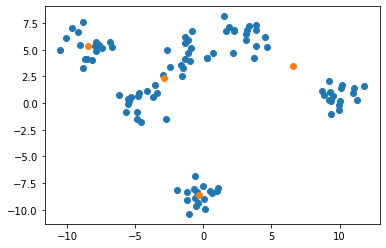

In [512]:
delt =100
et=0
while delt > epsil:
  mat =[[0 for i in range(len(k))] for j in range(len(X))]
  i,j=0,0;
  for i in range(len(X)):
    for j in range(len(k)):
      mat[i][j] = math.sqrt((X[i,0]-k[j,0])**2+(X[i,1]-k[j,1])**2)
    
  i,j=0,0;
  knear=[0]*len(X)
  for i in range(len(X)):
    min =2000
    for j in range(len(k)):
      if mat[i][j] < min:
        min = mat[i][j]
        knear[i]=j
      else:
          min =min
  n,q=0,0;
  newk=[[0 for i in range (3)] for j in  range (len(k))] 
  for n in range(len(X)):
    for q in range(len(k)):
      if knear[n] == q:
        newk[q][0]+=X[n,0]
        newk[q][1]+=X[n,1]
        newk[q][2]+=1
  delt =0
  m=0
  #print(k1[m][0],k[m][0])
  for m in range (len(k)):
    k1[m][0]=newk[m][0]/newk[m][2]
    k1[m][1]=newk[m][1]/newk[m][2]
    #print(k1[m][0],k[m][0])
    delt += math.sqrt((k1[m][0]-k[m][0])**2 + (k1[m][1]-k[m][1])**2)
    print(delt)
  i,j=0,0;
  for i in range(len(k)):
    for j in range(2): 
      k[i][j]=k1[i][j]
  et+=1  
  print(et)
plt.scatter(X[:,0], X[:,1])
plt.scatter(k[:,0], k[:,1])

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()


,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [ ]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,Марка_Brilliance,Марка_Buick,Марка_Cadillac,Марка_Changan,Марка_Chery,Марка_Chevrolet,Марка_Chrysler,Марка_Citroen,Марка_Dacia,Марка_Daewoo,Марка_Daihatsu,Марка_Datsun,Марка_Derways,Марка_Dodge,Марка_DongFeng,Марка_Doninvest,Марка_FAW,Марка_Fiat,Марка_Ford,Марка_Foton,Марка_GMC,Марка_Geely,Марка_Great Wall,Марка_Hafei,Марка_Haima,Марка_Haval,Марка_Hawtai,Марка_Honda,Марка_Hummer,Марка_Hyundai,...,Марка_ВАЗ,Марка_ВИС,Марка_ГАЗ,Марка_ЗАЗ,Марка_ИЖ,Марка_ЛуАЗ,Марка_Москвич,Марка_СМЗ (СеАЗ),Марка_Самоделка,Марка_ТагАЗ,Марка_УАЗ,Состояние_БУ,Топливо_бензин,Топливо_газ,Топливо_гибридный,Топливо_дизель,Топливо_электродвигатель,Кузов_внедорожник,Кузов_кабриолет,Кузов_кроссовер,Кузов_купе,Кузов_лимузин,Кузов_минивэн,Кузов_пикап,Кузов_родстер,Кузов_седан,Кузов_универсал,Кузов_хэтчбек,Привод_задний,Привод_передний,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,Марка_Brilliance,Марка_Buick,Марка_Cadillac,Марка_Changan,Марка_Chery,Марка_Chevrolet,Марка_Chrysler,Марка_Citroen,Марка_Dacia,Марка_Daewoo,Марка_Daihatsu,Марка_Datsun,Марка_Derways,Марка_Dodge,Марка_DongFeng,Марка_Doninvest,Марка_FAW,Марка_Fiat,Марка_Ford,Марка_Foton,Марка_GMC,Марка_Geely,Марка_Great Wall,Марка_Hafei,Марка_Haima,Марка_Haval,Марка_Hawtai,Марка_Honda,Марка_Hummer,Марка_Hyundai,...,Марка_ВАЗ,Марка_ВИС,Марка_ГАЗ,Марка_ЗАЗ,Марка_ИЖ,Марка_ЛуАЗ,Марка_Москвич,Марка_СМЗ (СеАЗ),Марка_Самоделка,Марка_ТагАЗ,Марка_УАЗ,Состояние_БУ,Топливо_бензин,Топливо_газ,Топливо_гибридный,Топливо_дизель,Топливо_электродвигатель,Кузов_внедорожник,Кузов_кабриолет,Кузов_кроссовер,Кузов_купе,Кузов_лимузин,Кузов_минивэн,Кузов_пикап,Кузов_родстер,Кузов_седан,Кузов_универсал,Кузов_хэтчбек,Привод_задний,Привод_передний,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0


In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(10,15,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)


10
11
12
13
14


In [ ]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print(claster['Привод'].value_counts().head(1))
    print(claster['Марка'].value_counts().head(2))
    print(claster['Кузов'].value_counts().head(2))
    print(claster['КПП'].value_counts().head(2))
    print('---------------------------')

In [ ]:
for it in range(14):
    cls_info(df, it)

------ Кластер  0  -------
1998.9392735527808
74917.83030646991
1718.2179341657209
84.42678774120319
97487.87741203178
передний    635
Name: Привод, dtype: int64
ВАЗ    1047
УАЗ     193
Name: Марка, dtype: int64
седан          778
внедорожник    488
Name: Кузов, dtype: int64
механика    1669
автомат       91
Name: КПП, dtype: int64
---------------------------
------ Кластер  1  -------
2012.7862289831864
61898.330664531626
2147.638110488391
171.2113690952762
1200392.9543634907
полный    1561
Name: Привод, dtype: int64
Toyota    362
Audi      225
Name: Марка, dtype: int64
кроссовер    1293
седан         618
Name: Кузов, dtype: int64
автомат     1974
вариатор     238
Name: КПП, dtype: int64
---------------------------
------ Кластер  2  -------
1997.5180124223602
270472.0881987578
2222.360248447205
142.11428571428573
238113.5950310559
передний    690
Name: Привод, dtype: int64
Toyota           274
Mercedes-Benz    186
Name: Марка, dtype: int64
седан          909
внедорожник    200
Name: 